In [1]:
# Import libraries:
import numpy as np
from matplotlib import pyplot as plt

# RF period (325 MHz frequency):
T = 1/(325*10**6)*10**9 # ns

# Length of period:
len_period = 4.2 # m

# Load data from output txt file:
file = 'AllTracks.txt'
# file = 'sol_current_scan/g4bl-output-sim6/AllTracks.txt'
data = np.loadtxt(file)

# Figure directory:
fig_dir = 'Figures/'

In [2]:
# Values along channel:
x_vals = []; y_vals = []; z_vals = []
px_vals = []; py_vals = []; pz_vals = []; ptotal_vals = []
t_vals = []; mod_t_vals = []
Bx_vals = []; By_vals = []; Bz_vals = []
next_z = 0.5; period_start_z_vals = []; period_start_indices = [] # start solenoid placement at 0.5m
for i in range(data.shape[0]):
    x_vals.append(data[i][0]*0.1) # mm -> cm
    y_vals.append(data[i][1]*0.1)
    z = data[i][2]*0.001 # mm -> m
    z_vals.append(z)
    px = data[i][3]; py = data[i][4]; pz = data[i][5]
    px_vals.append(px) # MeV/c
    py_vals.append(py)
    pz_vals.append(pz)
    ptotal_vals.append(np.sqrt(px**2+py**2+pz**2))
    t = data[i][6]
    t_vals.append(t) # ns
    mod_t = t % T
    mod_t_vals.append(mod_t)
    # Bx = data[i][12]; By = data[i][13]; Bz = data[i][14]
    Bx = data[i][12]*200; By = data[i][13]*200; Bz = data[i][14] # rescale Bx, By for plotting
    Bx_vals.append(Bx)
    By_vals.append(By)
    Bz_vals.append(Bz)
    del px, py, pz, t, Bx, By, Bz

    # Find indices for first value in each period:
    if z > next_z:
        period_start_z_vals.append(z)
        period_start_indices.append(i)
        next_z += len_period

# Remove last period -- just for reducing end field effects:
start_last_period = period_start_indices[len(period_start_indices)-1]
x_vals = x_vals[:start_last_period]
y_vals = y_vals[:start_last_period]
z_vals = z_vals[:start_last_period]
px_vals = px_vals[:start_last_period]
py_vals = py_vals[:start_last_period]
pz_vals = pz_vals[:start_last_period]
Bx_vals = Bx_vals[:start_last_period]
By_vals = By_vals[:start_last_period]
Bz_vals = Bz_vals[:start_last_period]

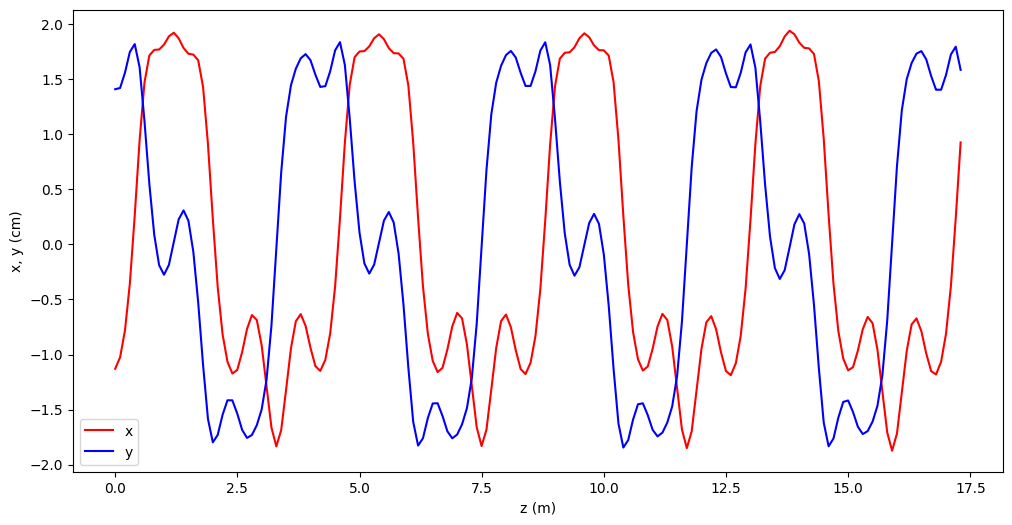

In [3]:
# Plot x, y along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,x_vals,color='red',label='x')
plt.plot(z_vals,y_vals,color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

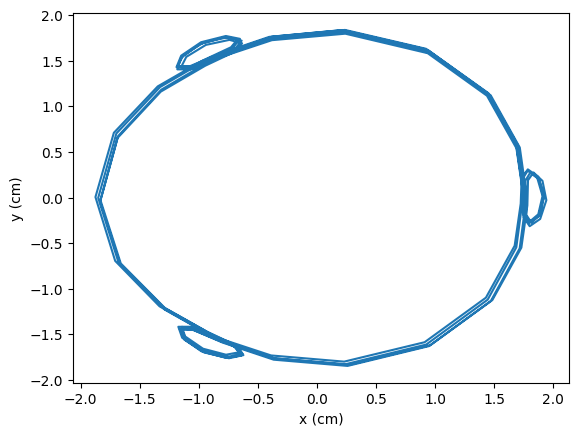

In [4]:
# Plot projection in x-y plane:
plt.figure()
plt.plot(x_vals,y_vals)
plt.xlabel('x (cm)')
plt.ylabel('y (cm)')
plt.show()

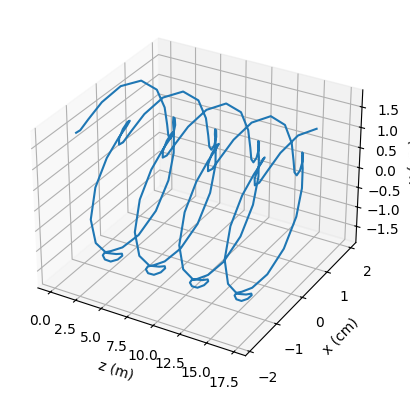

In [5]:
# 3D plot of trajectory:
# %matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot(z_vals,x_vals,y_vals)
ax.set_xlabel('z (m)')
ax.set_ylabel('x (cm)')
ax.set_zlabel('y (cm)')
plt.show()

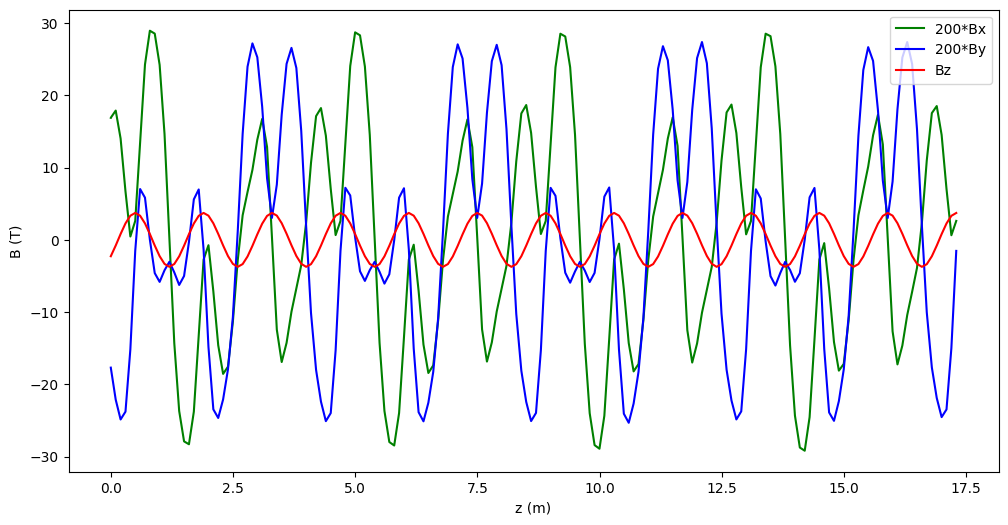

In [6]:
# Plot magnetic field along z:
plt.figure(figsize = (12,6))
plt.plot(z_vals,Bx_vals,color='green',label='200*Bx')
plt.plot(z_vals,By_vals,color='blue',label='200*By')
plt.plot(z_vals,Bz_vals,color='red',label='Bz')
plt.xlabel('z (m)')
plt.ylabel('B (T)')
plt.legend()
plt.show()

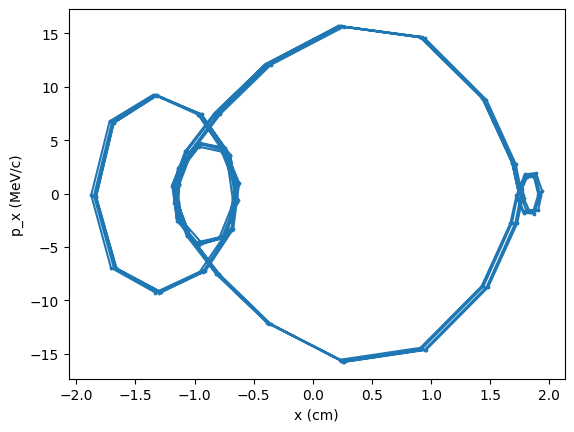

In [7]:
# Plot phase space trajectory (x):
plt.figure()
plt.scatter(x_vals,px_vals,s=3)
plt.plot(x_vals,px_vals)
plt.xlabel('x (cm)')
plt.ylabel('p_x (MeV/c)')
plt.show()

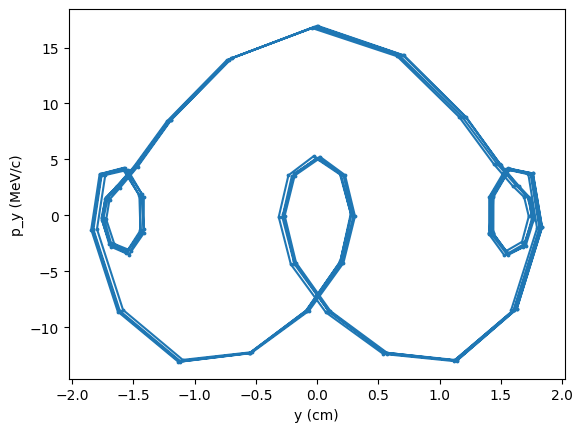

In [8]:
# Plot phase space trajectory (y):
plt.figure()
plt.scatter(y_vals,py_vals,s=3)
plt.plot(y_vals,py_vals)
plt.xlabel('y (cm)')
plt.ylabel('p_y (MeV/c)')
plt.show()

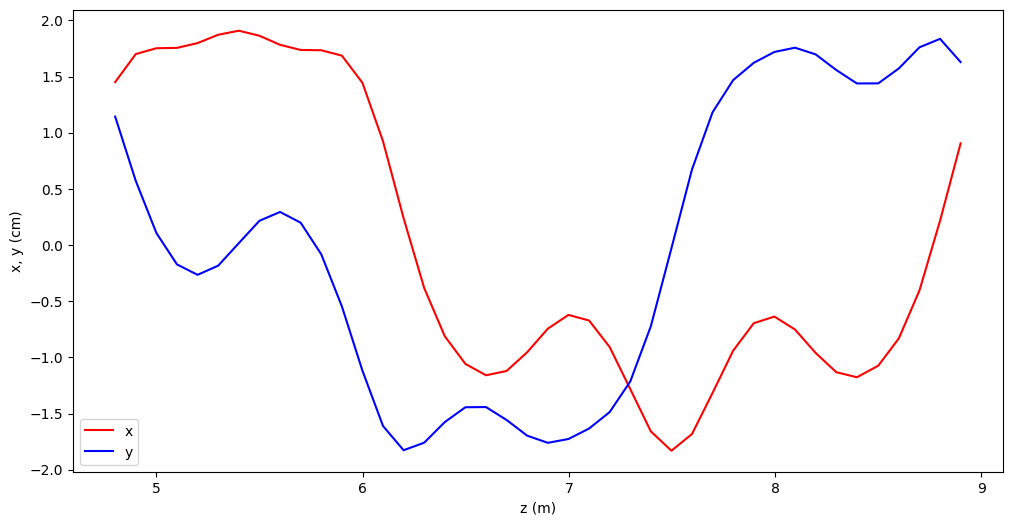

In [9]:
# Plot trajectory for second period only:
plt.figure(figsize = (12,6))
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],x_vals[period_start_indices[1]:period_start_indices[2]],color='red',label='x')
plt.plot(z_vals[period_start_indices[1]:period_start_indices[2]],y_vals[period_start_indices[1]:period_start_indices[2]],color='blue',label='y')
plt.xlabel('z (m)')
plt.ylabel('x, y (cm)')
plt.legend()
plt.show()

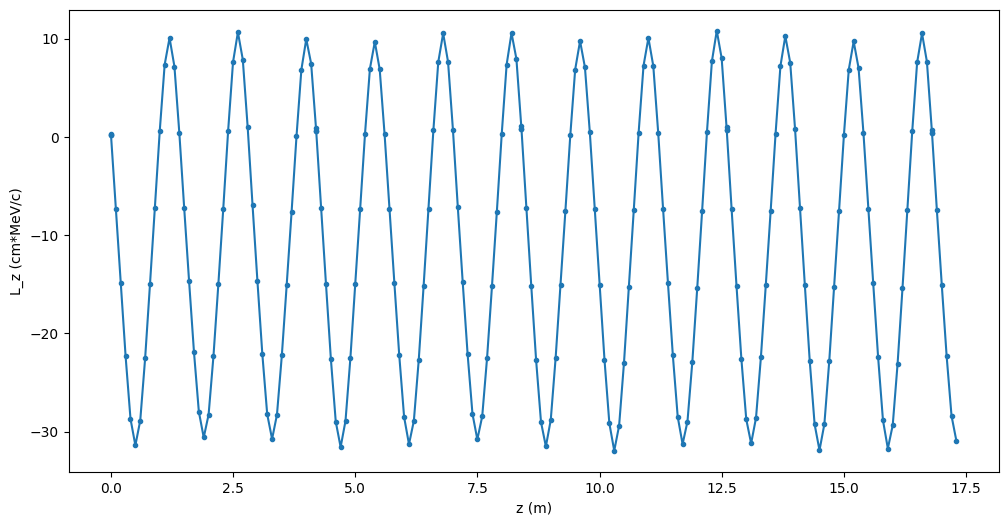

In [10]:
# Plot angular momentum:
# %matplotlib widget
Lz_vals = []
for i in range(len(z_vals)):
    Lz = x_vals[i]*py_vals[i]-y_vals[i]*px_vals[i]
    Lz_vals.append(Lz)
plt.figure(figsize = (12,6))
plt.plot(z_vals,Lz_vals,marker='.')
plt.xlabel('z (m)')
plt.ylabel('L_z (cm*MeV/c)')
plt.show()

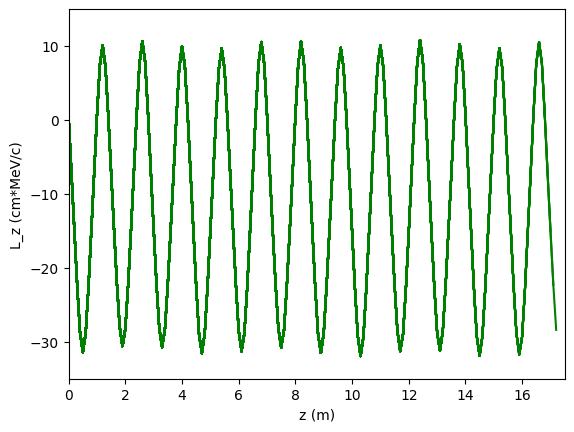

In [11]:
# Animation of Lz along z:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animate(frame):
    plt.plot(z_vals[:frame],Lz_vals[:frame],color='green')
    plt.xlim((0,17.5))
    plt.ylim((-35,15))
    plt.ylabel('L_z (cm*MeV/c)')
    plt.xlabel('z (m)')
animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
animation.save('Lz_animation.gif', writer='pillow')

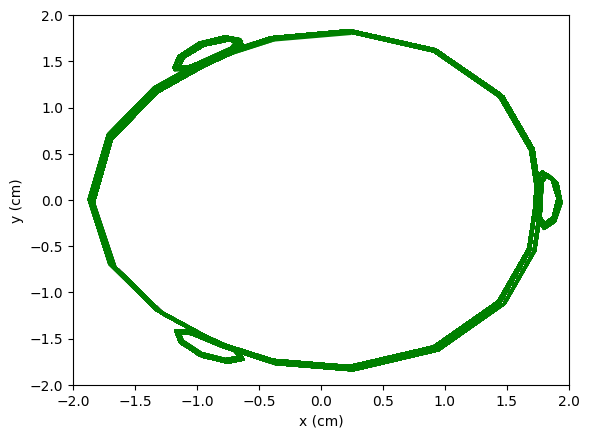

In [12]:
# Animation of trajectory in xy-plane along z:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
def animate(frame):
    plt.plot(x_vals[:frame],y_vals[:frame],color='green')
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.xlabel('x (cm)')
    plt.ylabel('y (cm)')
animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
animation.save('xy_animation.gif', writer='pillow')

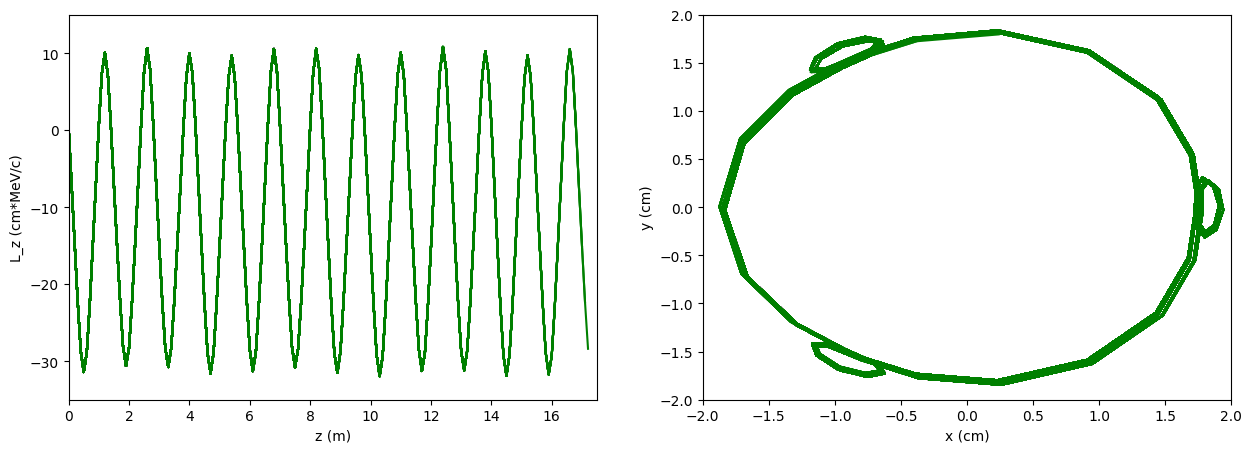

In [13]:
# Animation of xy trajectory and Lz along z:
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # Lz plot:
    ax1.plot(z_vals[:frame],Lz_vals[:frame],color='green')
    ax1.set_xlim((0,17.5))
    ax1.set_ylim((-35,15))
    ax1.set_ylabel('L_z (cm*MeV/c)')
    ax1.set_xlabel('z (m)')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='green')
    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('x (cm)')
    ax2.set_ylabel('y (cm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
animation.save('Lz_and_xy_animation.gif', writer='pillow')

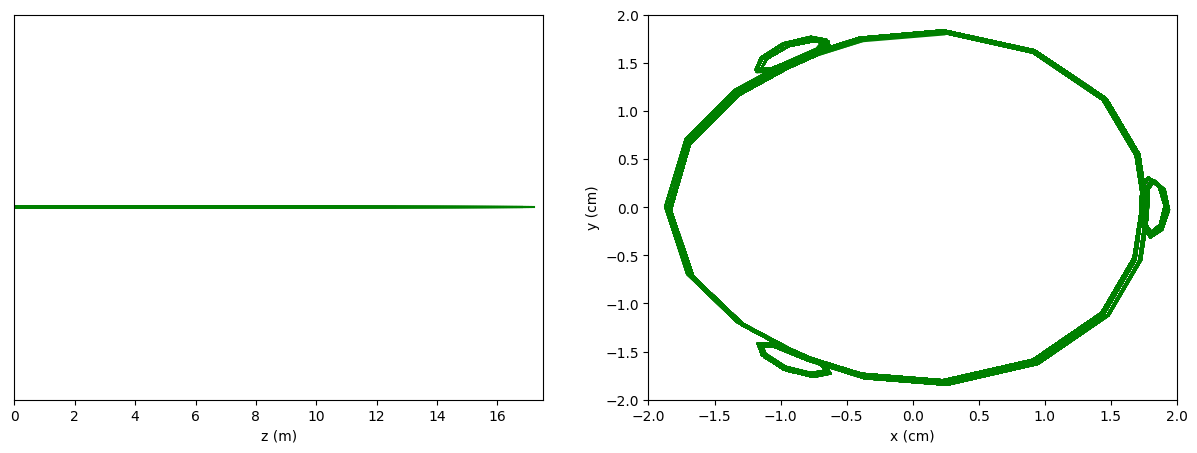

In [14]:
# Animation of xy trajectory and z vs. t (to vizualize timing with lattice elements):
# %matplotlib widget
from matplotlib.animation import FuncAnimation
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
def animate(frame):

    # z plot:
    vals = np.zeros(frame)
    ax1.plot(z_vals[:frame],vals,color='green')
    ax1.set_xlim((0,17.5))
    ax1.set_ylim((-1,1))
    ax1.set_yticks([])
    ax1.set_xlabel('z (m)')

    # x,y plot:
    ax2.plot(x_vals[:frame],y_vals[:frame],color='green')
    ax2.set_xlim((-2,2))
    ax2.set_ylim((-2,2))
    ax2.set_xlabel('x (cm)')
    ax2.set_ylabel('y (cm)')

animation = FuncAnimation(fig, animate, frames=len(z_vals), interval=250, repeat=True)
animation.save('z_and_xy.gif', writer='pillow')